In [2]:

import numpy as np


def mi_DFT(xx):
    N = len(xx)
    K = N//2
    XX = np.empty(K, dtype=complex)
    
    for k in range(K):
        
        XX[k]=0 
        
        for n in range(N-1):
            
            W = np.cos(2*np.pi*k*n/N) + 1j*np.sin(2*np.pi*k*n/N)
            XX[k]+= xx[n]*W 
            
        XX[k]= abs(XX[k])   
        
        
    fs = np.linspace(0,K-1,N//2)
    
    return fs, XX

Armamos la funcion DFT y la probamos pasandole una senoidal

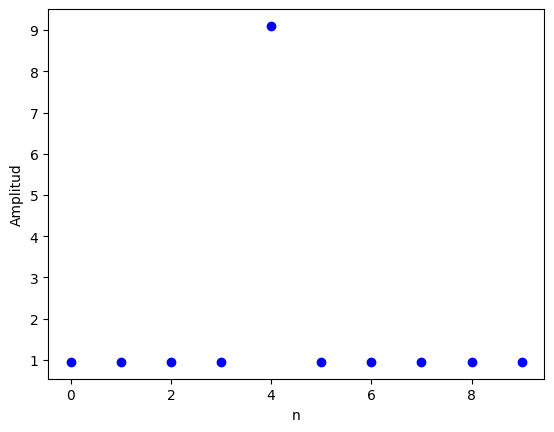

In [19]:
from seno import sen 

import matplotlib.pyplot as plt 

tt, xx = sen(N=20, FADC=20, frec=4)

fs, XX = mi_DFT(xx)

plt.figure()
plt.plot(fs, XX, 'bo')
plt.ylabel('Amplitud')
plt.xlabel('n')
plt.show()

Ahora podemos preguntarnos que pasa al cambiar la frecuencia de muestreo o la cantidad de muestras

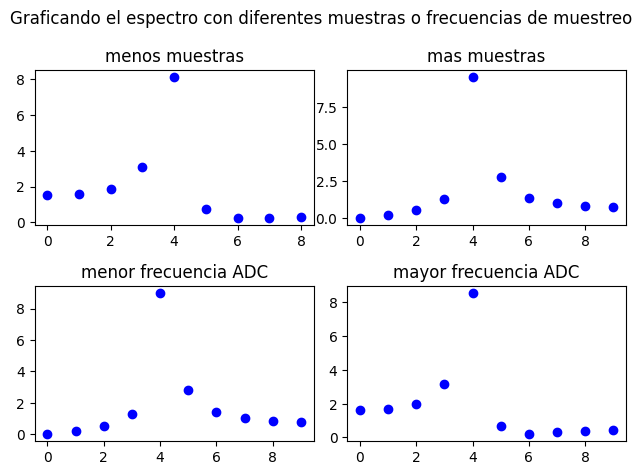

In [24]:
tt, xx = sen(N=19, FADC=20, frec=4)
fs1, XX1 = mi_DFT(xx)


tt, xx = sen(N=21, FADC=20, frec=4)
fs2, XX2 = mi_DFT(xx)



tt, xx = sen(N=20, FADC=19, frec=4)
fs3, XX3 = mi_DFT(xx)



tt, xx = sen(N=20, FADC=21, frec=4)
fs4, XX4 = mi_DFT(xx)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Graficando el espectro con diferentes muestras o frecuencias de muestreo')
ax1.plot(fs1,XX1, 'bo')
ax1.set_title('menos muestras')
ax2.plot(fs2,XX2, 'bo')
ax2.set_title('mas muestras')
ax3.plot(fs3,XX3, 'bo')
ax3.set_title('menor frecuencia ADC')
ax4.plot(fs4,XX4, 'bo')
ax4.set_title('mayor frecuencia ADC')
plt.tight_layout()
plt.show()



Vemos que ya no coinciden con la delta, se intuye que es debido a que la resolucion espectral cambia $$df = \frac{fs}{n}$$ 

Y la frecuencia de nuestra senoidal ya no es multiplo entero de la misma, para verificarlo probemos con ciertos valores de N y FADC

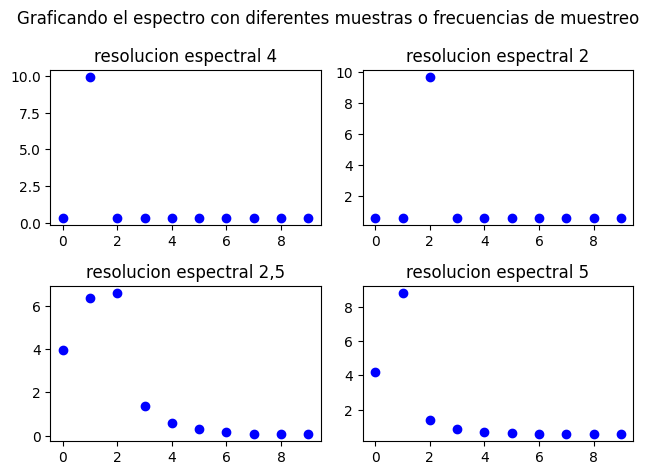

In [25]:
tt, xx = sen(N=20, FADC=80, frec=4) #FADC/N = 4, deberia visualizar bien 4 htz
fs1, XX1 = mi_DFT(xx)

tt, xx = sen(N=20, FADC=40, frec=4) #FADC/N = 2, deberia visualizar bien 4 htz
fs2, XX2 = mi_DFT(xx)

tt, xx = sen(N=20, FADC=50, frec=4) #FADC/N = 2,5, 4hts no es multiplo
fs3, XX3 = mi_DFT(xx)

tt, xx = sen(N=20, FADC=100, frec=4) #FADC/N = 5, 4hts esta por debajo de la resolucion
fs4, XX4 = mi_DFT(xx)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Graficando el espectro con diferentes muestras o frecuencias de muestreo')
ax1.plot(fs1,XX1, 'bo')
ax1.set_title('resolucion espectral 4')
ax2.plot(fs2,XX2, 'bo')
ax2.set_title('resolucion espectral 2')
ax3.plot(fs3,XX3, 'bo')
ax3.set_title('resolucion espectral 2,5')
ax4.plot(fs4,XX4, 'bo')
ax4.set_title('resolucion espectral 5')
plt.tight_layout()
plt.show()

Parece ser que el espectro se grafica bien si la frecuencia resulta multiplo de nuestra resolucion espectral.

Finalmente probemos agregando mas senoidales y comparemos con el grafico obtenido con la FFT de numpy

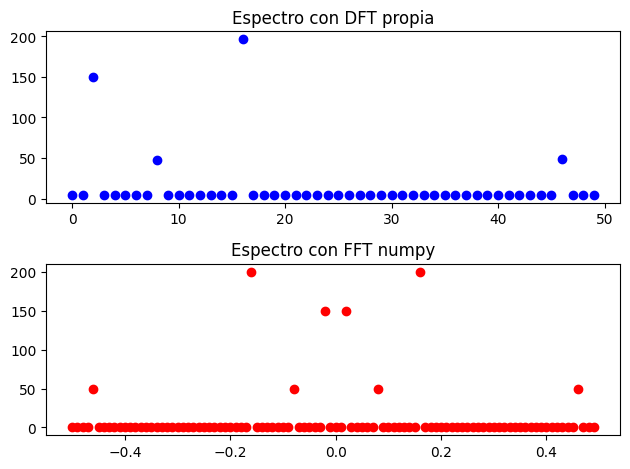

In [32]:
tt, xx2 = sen(A=3,N=100, FADC=100, frec=2)
tt, xx3 = sen(N=100, FADC=100, frec=8)
tt, xx4 = sen(A=4,N=100, FADC=100, frec=16)
tt, xx5 = sen(N=100, FADC=100, frec=46)

xx = xx2+xx3+xx4+xx5
fs, XX = mi_DFT(xx)

sp= abs(np.fft.fft(xx))
freq = np.fft.fftfreq(tt.shape[-1])


fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(fs, XX, 'bo')
ax1.set_title('Espectro con DFT propia')
ax2.plot(freq, sp, 'ro')
ax2.set_title('Espectro con FFT numpy')
plt.tight_layout()
plt.show()

Muestra la otra mitad y tambien tiene una escala diferente en el eje de frecuencia, pero la morfologia es la misma